In [64]:
# Dataset: https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&refine.country=Spain&q=Madrid
# Link directo: https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B

In [65]:
# Recurso para aprender a cargar datos en Colab: 
# https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

In [66]:
# nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2022-06-14 20:48:22--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [            <=>     ]  54.31M   872KB/s    in 65s     

2022-06-14 20:49:30 (856 KB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [67]:
!ls -lah

total 55M
drwxr-xr-x 1 root root 4.0K Jun 14 20:41 .
drwxr-xr-x 1 root root 4.0K Jun 14 20:38 ..
-rw-r--r-- 1 root root  55M Jun 14 20:49 airbnb-listings.csv
drwxr-xr-x 4 root root 4.0K Jun  1 13:49 .config
drwxr-xr-x 1 root root 4.0K Jun  1 13:50 sample_data


In [68]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros
import pandas as pd
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,...,10.0,10.0,10.0,NaN,NaN,moderate,2,5.11,"40.40745268477803,-3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,...,9.0,9.0,8.0,NaN,NaN,strict,13,5.88,"40.40831556101927,-3.705006385704201","Host Has Profile Pic,Host Identity Verified,Re..."
2,17444981,https://www.airbnb.com/rooms/17444981,20170407214119,2017-04-08,Cosy Apartment SOL/LA LATINA,Nice apartment near Sol and La Latina. Perfect...,Is a really cosy apartment with the best locat...,Nice apartment near Sol and La Latina. Perfect...,none,"La Latina is well known by El Rastro, the most...",...,10.0,10.0,10.0,NaN,NaN,moderate,1,6.18,"40.413722014584295,-3.7068231186536718","Host Has Profile Pic,Host Identity Verified,Re..."
3,3284565,https://www.airbnb.com/rooms/3284565,20170407214119,2017-04-08,Alquiler Estudio Nuevo Madrid,"Alquilo estudio en el centro de Madrid , total...",NaN,"Alquilo estudio en el centro de Madrid , total...",none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,3,0.19,"40.411263372718054,-3.6973054373712886","Host Has Profile Pic,Host Identity Verified,Is..."
4,499911,https://www.airbnb.com/rooms/499911,20170407214119,2017-04-08,2 bedroom apartment downtown Madrid,NaN,Bright and airy apartment in Central Madrid re...,Bright and airy apartment in Central Madrid re...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,1,1.39,"40.41255625665078,-3.701155364799422","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [69]:
import imageio as io
import numpy as np
import cv2
n_images = 1000
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = data['Thumbnail Url']

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        images[i_aux] = cv2.resize(img, (224, 224))
        good_urls.append(i_img)
        i_aux += 1
        print(f'Imagen {i_img} descargada')
    except IOError as err:
        pass

Imagen 0 descargada
Imagen 1 descargada
Imagen 2 descargada
Imagen 4 descargada
Imagen 7 descargada
Imagen 11 descargada
Imagen 13 descargada
Imagen 15 descargada
Imagen 16 descargada
Imagen 17 descargada
Imagen 21 descargada
Imagen 23 descargada
Imagen 24 descargada
Imagen 25 descargada
Imagen 26 descargada
Imagen 27 descargada
Imagen 28 descargada
Imagen 29 descargada
Imagen 30 descargada
Imagen 31 descargada
Imagen 32 descargada
Imagen 33 descargada
Imagen 34 descargada
Imagen 35 descargada
Imagen 36 descargada
Imagen 37 descargada
Imagen 38 descargada
Imagen 39 descargada
Imagen 40 descargada
Imagen 41 descargada
Imagen 43 descargada
Imagen 44 descargada
Imagen 45 descargada
Imagen 46 descargada
Imagen 47 descargada
Imagen 48 descargada
Imagen 49 descargada
Imagen 50 descargada
Imagen 51 descargada
Imagen 52 descargada
Imagen 53 descargada
Imagen 54 descargada
Imagen 55 descargada
Imagen 56 descargada
Imagen 57 descargada
Imagen 58 descargada
Imagen 59 descargada
Imagen 60 descarga

In [70]:
# mantenemos los datos numéricos solo para aquellos pisos que tienen imágenes 
# y las hemos obtenido
final_data = data.iloc[good_urls, :]

In [71]:
final_data.shape

(1000, 89)

In [72]:
#Tamaño del DF con Imágenes
print(images.shape)

(1000, 224, 224, 3)


In [73]:
# ¿De qué variables disponemos?
final_data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Cargamos las imágenes en un array para tenerlas disponibles luego

In [74]:
# aquí creamos nuestra estructura de datos, que va a consistir en la url de la
# imagen y un índice para saber donde insertarla en nuestro array
# images_paths = [[i, img_url] for i, img_url in enumerate(data['Thumbnail Url'])]

In [75]:
# vamos a ver cómo ha quedado
# images_paths[:5]

In [76]:
# import numpy as np

# # en este array iremos incrustando las imágenes conforme las vayamos obteniendo
# loaded_images = np.zeros((len(images_paths), 224, 224, 3), dtype=np.uint8)

# # y en este array llevaremos un control de cuales se han cargado correctamente
# # y cuales no
# was_loaded = np.zeros(len(images_paths))

In [77]:
# print(loaded_images.shape)

In [78]:
# print(was_loaded.shape)

In [79]:
# import concurrent
# from tqdm import tqdm

# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina
# with concurrent.futures.ProcessPoolExecutor() as executor:
#     # procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
#     for (img, idx) in tqdm(executor.map(get_image, images_paths), total=len(images_paths)):
#         # metemos la imagen en nuestro array
#         if img is not None:
#             loaded_images[idx] = img
#             was_loaded[idx] = 1
#         else:
#             was_loaded[idx] = 0

# print('Terminado!')
# print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded)}/{len(images_paths)}')

In [80]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
# np.save('images.npy', loaded_images)
# np.save('was_loaded.npy', was_loaded)

In [81]:
# # montamos GDrive
# from google.colab import drive
# drive.mount('/content/drive')

In [82]:
# np_images =np.load("/content/drive/MyDrive/images.npy")

In [83]:
# np_was_loaded = np.load("/content/drive/MyDrive/was_loaded.npy")

In [84]:
# np_images

In [85]:
# np_images.shape

In [86]:
# np_was_loaded.shape

In [87]:
# nos quedamos con los datos e imágenes para los que hemos podido encontrar imágenes

# data_with_imgs=data[np_was_loaded==1]
# images_with_imgs=np_images[np_was_loaded==1]

# images_with_imgs.shape


In [88]:
# seleccionamos la que será nuestra etiqueta
data=final_data
y_reg = data['Price']
y_reg.shape

(1000,)

# **Entonces, nuestro número de entradas CON imágenes es 11243**

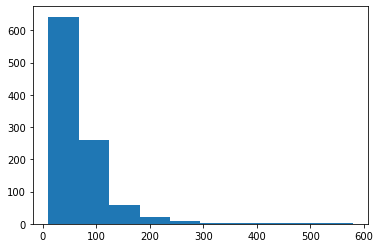

In [89]:
# y un rango para clasificación (del 1 al 3 por ejemplo: barato, normal, caro)
import matplotlib.pyplot as plt
plt.hist(y_reg, bins=10)
plt.show()

### Comienza la limpieza de datos

In [90]:
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Procederé a eliminar la gran mayoría de columnas que creo que no aportan mucho, además de las que ya conozco que tienen muchos datos faltantes (como por ejemplo, SquareFeet)

In [91]:
data = data.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
        'Street','Host Response Rate', 'Host Acceptance Rate', 'Neighbourhood Cleansed',
       'City', 'Country', 'Bed Type',
        'Review Scores Rating',
       'Neighbourhood Group Cleansed', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Latitude', 'Longitude',
       'Amenities', 'Square Feet', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 
        'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'First Review', 'Last Review',
       'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Jurisdiction Names',
       'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features',"Host Response Time","Neighbourhood","Host Verifications"], axis=1)


In [92]:
data.columns

Index(['Host Total Listings Count', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Cancellation Policy'],
      dtype='object')

columnas_numericas = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Host Total Listings Count']
:+1:
1

1:22
categóricas:['Property Type', 'Room Type', 'Cancellation Policy'] (

In [93]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Total Listings Count,1000.0,11.539000,31.143931,0.0,1.0,2.0,6.00,207.0
Accommodates,1000.0,3.150000,1.916552,1.0,2.0,2.0,4.00,16.0
Bathrooms,998.0,1.259018,0.582935,0.0,1.0,1.0,1.00,6.0
Bedrooms,998.0,1.294589,0.783090,0.0,1.0,1.0,2.00,5.0
Beds,996.0,1.920683,1.341541,1.0,1.0,1.0,2.00,14.0
Price,1000.0,67.327000,57.859795,10.0,32.0,52.0,80.00,579.0
Guests Included,1000.0,1.638000,1.237937,1.0,1.0,1.0,2.00,16.0
Extra People,1000.0,7.172000,9.556555,0.0,0.0,0.0,12.25,100.0
Minimum Nights,1000.0,2.469000,2.467616,1.0,1.0,2.0,3.00,25.0
Maximum Nights,1000.0,858.221000,563.502123,3.0,365.0,1125.0,1125.00,10000.0


***Ahora a ver si tenemos NAs ----------------------------------------------***

---



In [94]:
data.isna().sum()

Host Total Listings Count    0
Property Type                0
Room Type                    0
Accommodates                 0
Bathrooms                    2
Bedrooms                     2
Beds                         4
Price                        0
Guests Included              0
Extra People                 0
Minimum Nights               0
Maximum Nights               0
Number of Reviews            0
Cancellation Policy          0
dtype: int64

Bueno, esos son varios NAs. La columna Host Acceptance Rate la puedo directamente eliminar, mientras que utilizaré un simple fillna para el resto de los valores, utilizando el promedio como parámetro.

In [95]:
# data_with_imgs = data_with_imgs.drop(['Host Acceptance Rate'], axis=1)


In [96]:
data.columns

Index(['Host Total Listings Count', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Cancellation Policy'],
      dtype='object')

In [97]:
data.fillna(data.mean().round(1), inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [98]:
data.isna().sum()

Host Total Listings Count    0
Property Type                0
Room Type                    0
Accommodates                 0
Bathrooms                    0
Bedrooms                     0
Beds                         0
Price                        0
Guests Included              0
Extra People                 0
Minimum Nights               0
Maximum Nights               0
Number of Reviews            0
Cancellation Policy          0
dtype: int64

In [99]:
# data_with_imgs[data_with_imgs["City"].isna()]["City"]="Madrid" ----- Esto no me solucionaba el problema, y el siempre inteligente Python me sugiere que utilice df.loc
# data_with_imgs.loc[data_with_imgs["City"].isna(),"City"] = "Madrid" --- AL final no utilizo esta columna

**Qué maravilla... me encanta que el entorno piense por mí y solucione mis problemas. Para esto me metí en inteligencia artificial: para no tener que pensar por mí mismo (espero que les gusten los Simpsons)**

In [100]:
from IPython.display import Image
Image(url='https://i.gifer.com/3RWR.gif')


In [101]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Total Listings Count,1000.0,11.5390,31.143931,0.0,1.0,2.0,6.00,207.0
Accommodates,1000.0,3.1500,1.916552,1.0,2.0,2.0,4.00,16.0
Bathrooms,1000.0,1.2591,0.582354,0.0,1.0,1.0,1.00,6.0
Bedrooms,1000.0,1.2946,0.782306,0.0,1.0,1.0,2.00,5.0
Beds,1000.0,1.9206,1.338853,1.0,1.0,1.0,2.00,14.0
Price,1000.0,67.3270,57.859795,10.0,32.0,52.0,80.00,579.0
Guests Included,1000.0,1.6380,1.237937,1.0,1.0,1.0,2.00,16.0
Extra People,1000.0,7.1720,9.556555,0.0,0.0,0.0,12.25,100.0
Minimum Nights,1000.0,2.4690,2.467616,1.0,1.0,2.0,3.00,25.0
Maximum Nights,1000.0,858.2210,563.502123,3.0,365.0,1125.0,1125.00,10000.0


De aquí quiero graficar "Number of reviews" y "Extra People". La primera

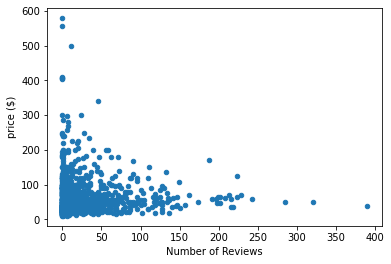

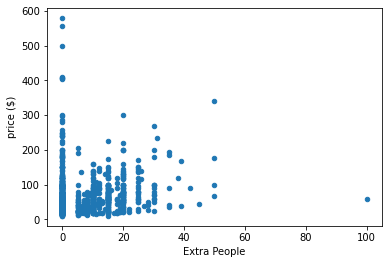

In [102]:
data.plot(kind = 'scatter',x='Number of Reviews',y = 'Price')
plt.xlabel('Number of Reviews')
plt.ylabel('price ($)')
plt.show()

data.plot(kind = 'scatter',x='Extra People',y = 'Price')
plt.xlabel('Extra People')
plt.ylabel('price ($)')
plt.show()


plt.show()

Ingresando en la página del dataset, me entero que "extra people" es lo que cuesta meter una persona extra. Hay varios hosts que parecen haberse confundido, ya que el precio marca 0 y las personas extra sí tienen un valor. Lo dejaré por ahora.

AHORA HAY QUE CODIFICAR VARIABLES CATEGÓRICAS 

In [103]:
# data_with_imgs.reset_index(drop=True,inplace=True)

In [104]:
data.columns

Index(['Host Total Listings Count', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Cancellation Policy'],
      dtype='object')

En mi dataset serían: Neighbourhood cleansed, city, country, property type, room type, bed type, y cancellation policy.

In [105]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data["Cancellation Policy"] = label_encoder.fit_transform(data["Cancellation Policy"])
data["Room Type"] = label_encoder.fit_transform(data["Room Type"])
data["Property Type"] = label_encoder.fit_transform(data["Property Type"])

data["Cancellation Policy"]=to_categorical(data["Cancellation Policy"])
data["Room Type"]=to_categorical(data["Room Type"])
data["Property Type"]=to_categorical(data["Property Type"])




In [106]:
data.shape


(1000, 14)

# Outliers
Esto ya no lo usamos (está todo comentado)

In [107]:
#Aquí eliminábamos outliers

# df=data
# prueba_indices=data
# df1 = df[df['Accommodates'] <= 11]
# df2 = df1[df1['Bathrooms'] <= 6]
# df3 = df2[df2['Bedrooms'] <= 7]
# df4 = df3[df3['Beds'] <= 11]
# df5 = df4[df4['Guests Included'] <= 10]
# df6 = df5[df5['Extra People'] <= 40]
# df7 = df6[df6['Minimum Nights'] <= 25]
# df8 = df7[df7['Number of Reviews'] <= 210]
# df9 = df8[df8['Host Total Listings Count'] <= 220]
# df10 = df9[df9['Price'] >=12 & (df9['Price'] <600)]
# df = df10

In [108]:
# prueba_indices[prueba_indices['Accommodates'] > 11].index

In [109]:
# prueba_indices2=prueba_indices
# prueba_indices2.shape
# prueba_indices2.reset_index()

In [110]:
# prueba_indices2[1,:]

In [111]:
# arr = prueba_indices
# # Delete element at index positions 1,2 and 3
# arr = np.delete(arr, [ 62,   655,   713,  1200,  2217,  2335,  2425,  2532,  2644,
#              2894,  3207,  3278,  3288,  3424,  3595,  4052,  4252,  4916,
#              5130,  5200,  5289,  5438,  5540,  5545,  5549,  5676,  5760,
#              5801,  6249,  6262,  6480,  6686,  6815,  6841,  6925,  7126,
#              7163,  7172,  7202,  7427,  7519,  7585,  7841,  7906,  8162,
#              8192,  8713,  8718,  8827,  9161,  9409,  9517,  9567,  9570,
#              9879,  9941,  9942, 10006, 10029, 10068, 10579, 10779, 10842,
#             10874, 10877, 11050, 11071, 11073, 11074, 11840, 12045, 12209,
#             12598, 12630, 12724, 12726, 12745, 12780, 12826, 13203, 13537,
#             13657, 13970],axis=0)
# print('Modified Numpy Array by deleting element at index position 1, 2 &amp; 3')
# print(arr)

In [112]:
# df[df['Accommodates'] >= 11].index

In [113]:
# data_with_imgs=df

In [114]:
# y_reg = data_with_imgs['Price']
# y_reg.shape

# Normalizar

In [115]:
data = data.drop(["Price"], axis=1) #Me deshago de la columna de prices


In [116]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Total Listings Count,1000.0,11.5390,31.143931,0.0,1.0,2.0,6.00,207.0
Property Type,1000.0,0.8350,0.371365,0.0,1.0,1.0,1.00,1.0
Room Type,1000.0,0.5880,0.492441,0.0,0.0,1.0,1.00,1.0
Accommodates,1000.0,3.1500,1.916552,1.0,2.0,2.0,4.00,16.0
Bathrooms,1000.0,1.2591,0.582354,0.0,1.0,1.0,1.00,6.0
Bedrooms,1000.0,1.2946,0.782306,0.0,1.0,1.0,2.00,5.0
Beds,1000.0,1.9206,1.338853,1.0,1.0,1.0,2.00,14.0
Guests Included,1000.0,1.6380,1.237937,1.0,1.0,1.0,2.00,16.0
Extra People,1000.0,7.1720,9.556555,0.0,0.0,0.0,12.25,100.0
Minimum Nights,1000.0,2.4690,2.467616,1.0,1.0,2.0,3.00,25.0


Ahora normalizar (leí en uno de los notebooks que keras tenía una función para preprocesar que también normalizaba, pero para no complicarme lo hago del modo más simple que recuerdo)

In [117]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columnas_numericas = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Host Total Listings Count']
       
data[columnas_numericas]=scaler.fit_transform(data[columnas_numericas])
# data = scaler.fit_transform(data)
# y_reg=scaler.fit_transform(y_reg) ESTO NO ME DEJA
data.max()


Host Total Listings Count    1.0
Property Type                1.0
Room Type                    1.0
Accommodates                 1.0
Bathrooms                    1.0
Bedrooms                     1.0
Beds                         1.0
Guests Included              1.0
Extra People                 1.0
Minimum Nights               1.0
Maximum Nights               1.0
Number of Reviews            1.0
Cancellation Policy          1.0
dtype: float64

In [118]:
y_reg=y_reg/y_reg.max()
y_reg.max()

1.0

# Perceptrón 
Creo que ya podemos empezar con nuestro perceptrón simple (pero nunca sencillo). Primero, dividimos entre train, validation y test.

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y_reg, test_size=0.33, random_state=69)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=69)

#Nos queda: 33% para test, 60% aproximadamente de train y 7% aproximadamente de validación

In [120]:
print('X_train shape:', X_train.shape)
print('X_validation shape:', X_validation.shape)
print('y_train shape:', y_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (603, 13)
X_validation shape: (67, 13)
y_train shape: (603,)
603 train samples
330 test samples


In [121]:
X_test

,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Cancellation Policy
1013,0.014493,1.0,1.0,0.466667,0.250000,0.2,0.307692,0.066667,0.15,0.083333,0.112234,0.071979,0.0
1244,0.048309,0.0,0.0,0.066667,0.166667,0.2,0.000000,0.066667,0.15,0.000000,0.002701,0.282776,0.0
1106,0.193237,1.0,1.0,0.200000,0.416667,0.4,0.153846,0.000000,0.00,0.083333,0.112234,0.000000,0.0
958,0.004831,1.0,1.0,0.200000,0.166667,0.2,0.076923,0.066667,0.10,0.083333,0.002901,0.028278,0.0
1202,0.004831,1.0,0.0,0.066667,0.166667,0.2,0.000000,0.000000,0.05,0.000000,0.112234,0.033419,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0.024155,1.0,0.0,0.000000,0.166667,0.2,0.000000,0.000000,0.00,0.041667,0.001200,0.000000,1.0
422,0.024155,1.0,1.0,0.200000,0.166667,0.4,0.076923,0.066667,0.10,0.041667,0.017705,0.002571,0.0
1235,0.062802,1.0,1.0,0.533333,0.333333,1.0,0.384615,0.000000,0.00,0.041667,0.112234,0.017995,1.0
92,0.004831,1.0,1.0,0.133333,0.166667,0.2,0.000000,0.000000,0.00,0.041667,0.112234,0.125964,1.0


In [122]:
import numpy as np
print(np.isnan(X_train))
print(np.isnan(np.sum(X_train)))
print(np.isnan(np.min(y_test)))


      Host Total Listings Count  Property Type  Room Type  Accommodates  \
1058                      False          False      False         False   
306                       False          False      False         False   
368                       False          False      False         False   
950                       False          False      False         False   
359                       False          False      False         False   
...                         ...            ...        ...           ...   
1169                      False          False      False         False   
817                       False          False      False         False   
528                       False          False      False         False   
620                       False          False      False         False   
1145                      False          False      False         False   

      Bathrooms  Bedrooms   Beds  Guests Included  Extra People  \
1058      False     False  False

In [123]:
X_train.shape[1]

13

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

input=X_train.shape[1]

modelMLP = Sequential()
modelMLP.add(Dense(8, input_dim=input, activation="relu"))
modelMLP.add(Dense(4, activation="relu"))
modelMLP.add(Dense(1, activation="linear")) 
#En caso de que queramos concatenar los datos con la CNN más adelante, deberíamos
#dejar la última capa de 4 neuronas.

opt = Adam(learning_rate=0.001, decay=1e-6)
modelMLP.compile(loss="mean_squared_error", optimizer=opt)

print("[INFO] training model...")
historia=modelMLP.fit(X_train, y_train, shuffle=True, validation_data=(X_validation, y_validation),	epochs=100, batch_size=200,verbose=2)

# Evaluamos el modelo
loss = modelMLP.evaluate(X_test, y_test)

print("[INFO] scores...")
print(f'Loss={loss}')


print("[INFO] predicting house prices...")
preds = modelMLP.predict(X_test)
diff = preds.flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np.abs(percentDiff)
print("[INFO] Imprimo error en porcentaje...")
print(absPercentDiff)

[INFO] training model...
Epoch 1/100
4/4 - 0s - loss: 0.1496 - val_loss: 0.1349 - 455ms/epoch - 114ms/step
Epoch 2/100
4/4 - 0s - loss: 0.1333 - val_loss: 0.1216 - 27ms/epoch - 7ms/step
Epoch 3/100
4/4 - 0s - loss: 0.1210 - val_loss: 0.1107 - 28ms/epoch - 7ms/step
Epoch 4/100
4/4 - 0s - loss: 0.1104 - val_loss: 0.0997 - 25ms/epoch - 6ms/step
Epoch 5/100
4/4 - 0s - loss: 0.0999 - val_loss: 0.0894 - 24ms/epoch - 6ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0900 - val_loss: 0.0803 - 26ms/epoch - 7ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0818 - val_loss: 0.0723 - 48ms/epoch - 12ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0741 - val_loss: 0.0652 - 27ms/epoch - 7ms/step
Epoch 9/100
4/4 - 0s - loss: 0.0674 - val_loss: 0.0591 - 26ms/epoch - 6ms/step
Epoch 10/100
4/4 - 0s - loss: 0.0615 - val_loss: 0.0534 - 26ms/epoch - 7ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0559 - val_loss: 0.0482 - 25ms/epoch - 6ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0510 - val_loss: 0.0437 - 26ms/epoch - 6ms/step
Epoch 13/100
4/4 - 0

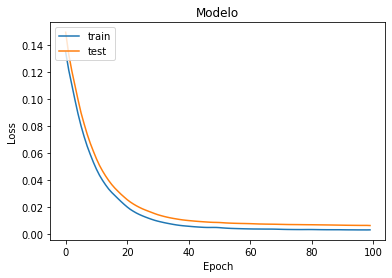

In [125]:
import matplotlib.pyplot as plt

plt.plot(historia.history['val_loss'])
plt.plot(historia.history['loss'])
# plt.plot(model.history['val_loss'])
plt.title('Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Hermosas curvas

### IMÁGENES
Regresión con CNN

In [126]:
y_reg.shape

(1000,)

Primero, normalizar:

In [127]:
images.max()

255

In [128]:
images_norm=images/255.

In [129]:
images.shape

(1000, 224, 224, 3)

Ahora cambiamos el tamaño de las imágenes: tienen 224x224 y queremos que sean de 32x32

In [130]:
input_shape = (32, 32, 3)
images_reshaped = []
for img in images:
  images_reshaped.append(np.resize(img, input_shape))
images_reshaped = np.array(images_reshaped)
print(images_reshaped.shape)

(1000, 32, 32, 3)


División entre train, test y validación:

In [131]:
# División entre train, test y validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_reshaped, y_reg, test_size=0.3, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=69)
y_train.shape

(630,)

In [139]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import MaxPooling2D

# Inizializamos el modelo
modelCNN = Sequential()

# Definimos una capa convolucional
modelCNN.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN.add(Dropout(0.25))

# Definimos una segunda capa convolucional
modelCNN.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN.add(Dropout(0.25))

# Definimos una tercera capa convolucional
modelCNN.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN.add(Dropout(0.25))

# Añadimos nuestra "salida" con 4 neuronas para que sean las mismas que en el MLP
modelCNN.add(Flatten())
modelCNN.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3.)))
modelCNN.add(Dropout(0.5))
modelCNN.add(Dense(1, activation='linear'))
#En caso de querer concatenar luego con el MLP, esta última capa debe tener
#4 neuronas y ser "relu"

# Compilamos el modelo
opt=Adam(learning_rate=0.0001, decay=1e-6)
modelCNN.compile(loss='mean_squared_error', optimizer=opt)

# Entrenamos el modelo
historia=modelCNN.fit(X_train, y_train, batch_size=100, shuffle=True, epochs=50, validation_data=(X_val, y_val)) 

# Evaluamos el modelo
loss = modelCNN.evaluate(X_test, y_test)

print("[INFO] scores...")
print(f'Loss={loss}')

Epoch 1/50
7/7 [==============================] - 1s 36ms/step - loss: 791.0114 - val_loss: 18.7247
Epoch 2/50
7/7 [==============================] - 0s 18ms/step - loss: 293.8401 - val_loss: 17.2567
Epoch 3/50
7/7 [==============================] - 0s 17ms/step - loss: 162.2255 - val_loss: 14.8338
Epoch 4/50
7/7 [==============================] - 0s 15ms/step - loss: 93.7008 - val_loss: 2.3727
Epoch 5/50
7/7 [==============================] - 0s 14ms/step - loss: 66.4400 - val_loss: 4.1611
Epoch 6/50
7/7 [==============================] - 0s 13ms/step - loss: 49.8963 - val_loss: 3.7040
Epoch 7/50
7/7 [==============================] - 0s 13ms/step - loss: 42.3660 - val_loss: 1.3452
Epoch 8/50
7/7 [==============================] - 0s 14ms/step - loss: 41.4592 - val_loss: 0.7449
Epoch 9/50
7/7 [==============================] - 0s 13ms/step - loss: 31.7808 - val_loss: 0.5010
Epoch 10/50
7/7 [==============================] - 0s 14ms/step - loss: 28.4065 - val_loss: 0.2877
Epoch 11/50
7

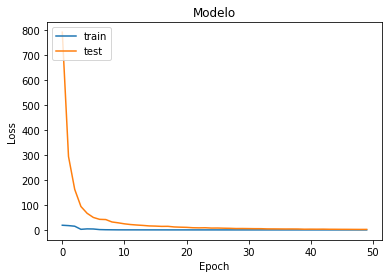

In [140]:
import matplotlib.pyplot as plt

plt.plot(historia.history['val_loss'])
plt.plot(historia.history['loss'])
plt.title('Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


No tan hermosas curvas


# Concatenamos nuestros MLP y CNN
Aquí hice el intento de seguir al blog y concatenar los outputs de mi CNN y mi MLP. Lamentablemente llegué a un callejón sin salida (o me quedé sin neuronas cereblales), porque me daba error en los tamaños de train, test y val.

Por otro lado, el ejemplo del blog no sería del todo correcto, ya que utiliza los conjuntos de testing como validación.

In [ ]:
from tensorflow.keras.layers import concatenate
combinedInput = concatenate([modelMLP.output, modelCNN.output])

input=combinedInput.shape[1]

In [ ]:
split = train_test_split(data, images, test_size=0.4, random_state=69)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split
print(trainAttrX.shape)
print(trainImagesX.shape)
print(y_test.shape)


(600, 13)
(600, 224, 224, 3)
(300,)


In [ ]:
model_hibrid = Sequential()

model_hibrid.add(Dense(4, input_dim=input, activation="relu"))
model_hibrid.add(Dense(1, activation="linear"))

opt = Adam(learning_rate=0.001, decay=1e-6)
model_hibrid.compile(loss="mean_squared_error", optimizer=opt)

print("[INFO] training model...")
# historia=model_hibrid.fit(X_train, y_train, shuffle=True, validation_data=(X_validation, y_validation),	epochs=100, batch_size=200,verbose=2)

# # Evaluamos el modelo
# loss = model_hibrid.evaluate(X_test, y_test)

# print("[INFO] scores...")
# print(f'Loss={loss}')

model_hibrid.fit(
	x=[trainAttrX, trainImagesX], y=y_train,
	validation_data=([testAttrX, testImagesX], y_test),
	epochs=200, batch_size=8)

print("[INFO] predicting house prices...")
preds = model_hibrid.predict([testAttrX, testImagesX])


# CON VGG16 - Modelo híbrido
Según lo indicado en la clase de consulta del domingo:

In [141]:
# creamos un modelo para extraer el vector de características de nuestras imágenes
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model_base = VGG16(weights='imagenet', include_top=False)

# creamos un modelo añadiéndole la capa GlobalAveragePooling
x = model_base.output
gap = GlobalAveragePooling2D()(x)
model = Model(inputs=model_base.input, outputs=gap)

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [142]:
#Predicción de cada una de las imágenes
from tqdm import tqdm  # para  mostrar el progreso
# vamos a procesarlas y a extraer el vector de 512 características
images_feat = np.zeros((n_images, 512))

for i in tqdm(range(images.shape[0])):
    img = images[i]
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    images_feat[i] = features[0]

100%|██████████| 1000/1000 [00:55<00:00, 18.08it/s]


In [143]:
images_feat.shape

(1000, 512)

In [144]:
data.shape

(1000, 13)

In [145]:
# Vamos a juntar las features de las imagenes y el dataset numérico/categórico
data_all = np.concatenate((data, images_feat), axis=1)
print(data_all.shape)

(1000, 525)


In [146]:
# División entre train, test y validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_all, y_reg, test_size=0.3, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=69)

In [147]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  

opt = Adam(learning_rate=0.01, decay=1e-6)
model.compile(loss='mean_squared_error', optimizer=opt)

print("[INFO] training model...")
historia=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=100, verbose=1)

# Evaluamos el modelo
loss = model.evaluate(X_test, y_test)

print("[INFO] scores...")
print(f'Loss={loss}')


[INFO] training model...
Epoch 1/50
7/7 [==============================] - 0s 22ms/step - loss: 117.2834 - val_loss: 1.5294
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 1.9075 - val_loss: 0.9324
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 1.0996 - val_loss: 1.2621
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6541 - val_loss: 0.1516
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.2784 - val_loss: 0.1994
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.1810 - val_loss: 0.1662
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.1064 - val_loss: 0.0216
Epoch 8/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0523 - val_loss: 0.0599
Epoch 9/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0448 - val_loss: 0.0179
Epoch 10/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0266 - val_loss: 0.0146
Epoch 11/50

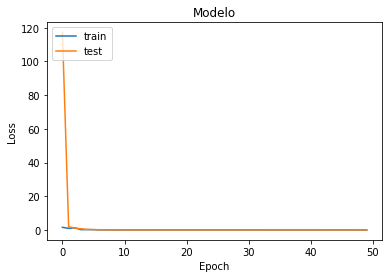

In [148]:
import matplotlib.pyplot as plt

plt.plot(historia.history['val_loss'])
plt.plot(historia.history['loss'])
# plt.plot(model.history['val_loss'])
plt.title('Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CONCLUSIÓN

En este notebook se crearon 3 modelos.

1) Un MLP o perceptrón multicapa. Este recibe los datos numéricos y categóricos de nuestro dataset de airbnb y, por medio de regresión, obtenemos un modelo que predice el precio de un piso.

2) una CNN o red neuronal convolucional 2D. Aquí lidiamos con las imágenes, luego de reescalarlas y normalizarlas. La red termina en una capa de 1 neurona (regresión) para predecir el precio.

3) Un modelo híbrido: comienza extrayendo características de imágenes por medio de una VGG16 (transfer learning). La salida de este modelo es un array de las 1000 imágenes con 512 características cada una. Unimos (concatenamos) este array con nuestros datos numéricos y lo metenmos en otra red de regresión de 3 capas, terminando en una única neurona para regresión.

De estos 3 modelos, en un principio parece que el MLP es el que arroja mejores resultados, pero se pueden modificar un poco algunos de los hiper parámetros, cantidad de capas, neuronas, número de épocas, etc. como para obtener algún resultado mejor.

En un momento, intenté seguir el ejemplo del blog de pyimagesearch, adaptándolo a las redes que ya tenía (MLP y CNN), pero se presentó un error al querer entrenar el modelo. Los conjuntos de train, test y validación tenían tamaños distintos, y no supe bien cómo resolverlo, así que esto quedó incompleto. Además, ese blog utiliza el conjunto de test como validación, lo que creo que está mal.

Si bien considero que profundicé mi manejo de redes neuronales durante esta práctica, algunos factores complejizaron el proceso: 
- La mayoría de los ejercicios en los notebooks son de clasificación y no de regresión, y casi todos con CNN. Vimos algo de regresión con datos numéricos al principio, pero solo a nivel bajo y sin keras.
- La mayoría de los problemas vinieron por el mismo dataset de airbnb (no lo quiero ver nunca más) y el manejo del mismo. Nos terminamos quedando con 1000 filas/imágenes (sin elegirlas al azar), y no quitamos outliers.
- Creo que los notebooks de las clases no están organizados de una forma en la que uno pueda volver a buscar cosas puntuales. Por ejemplo, me pasé bastante tiempo buscando cómo categorizar y normalizar mis datos numéricos y categóricos.

Esto viene como introspección/comentario constructivo :)

Hice mi mejor intento por explicar mis pasos, procesos y análisis de lo que iba haciendo en cada parte. Espero sirva! Mis disculpas por el desorden 😀
